# ***Codes for Decision Tree Overfitting Visualizations***



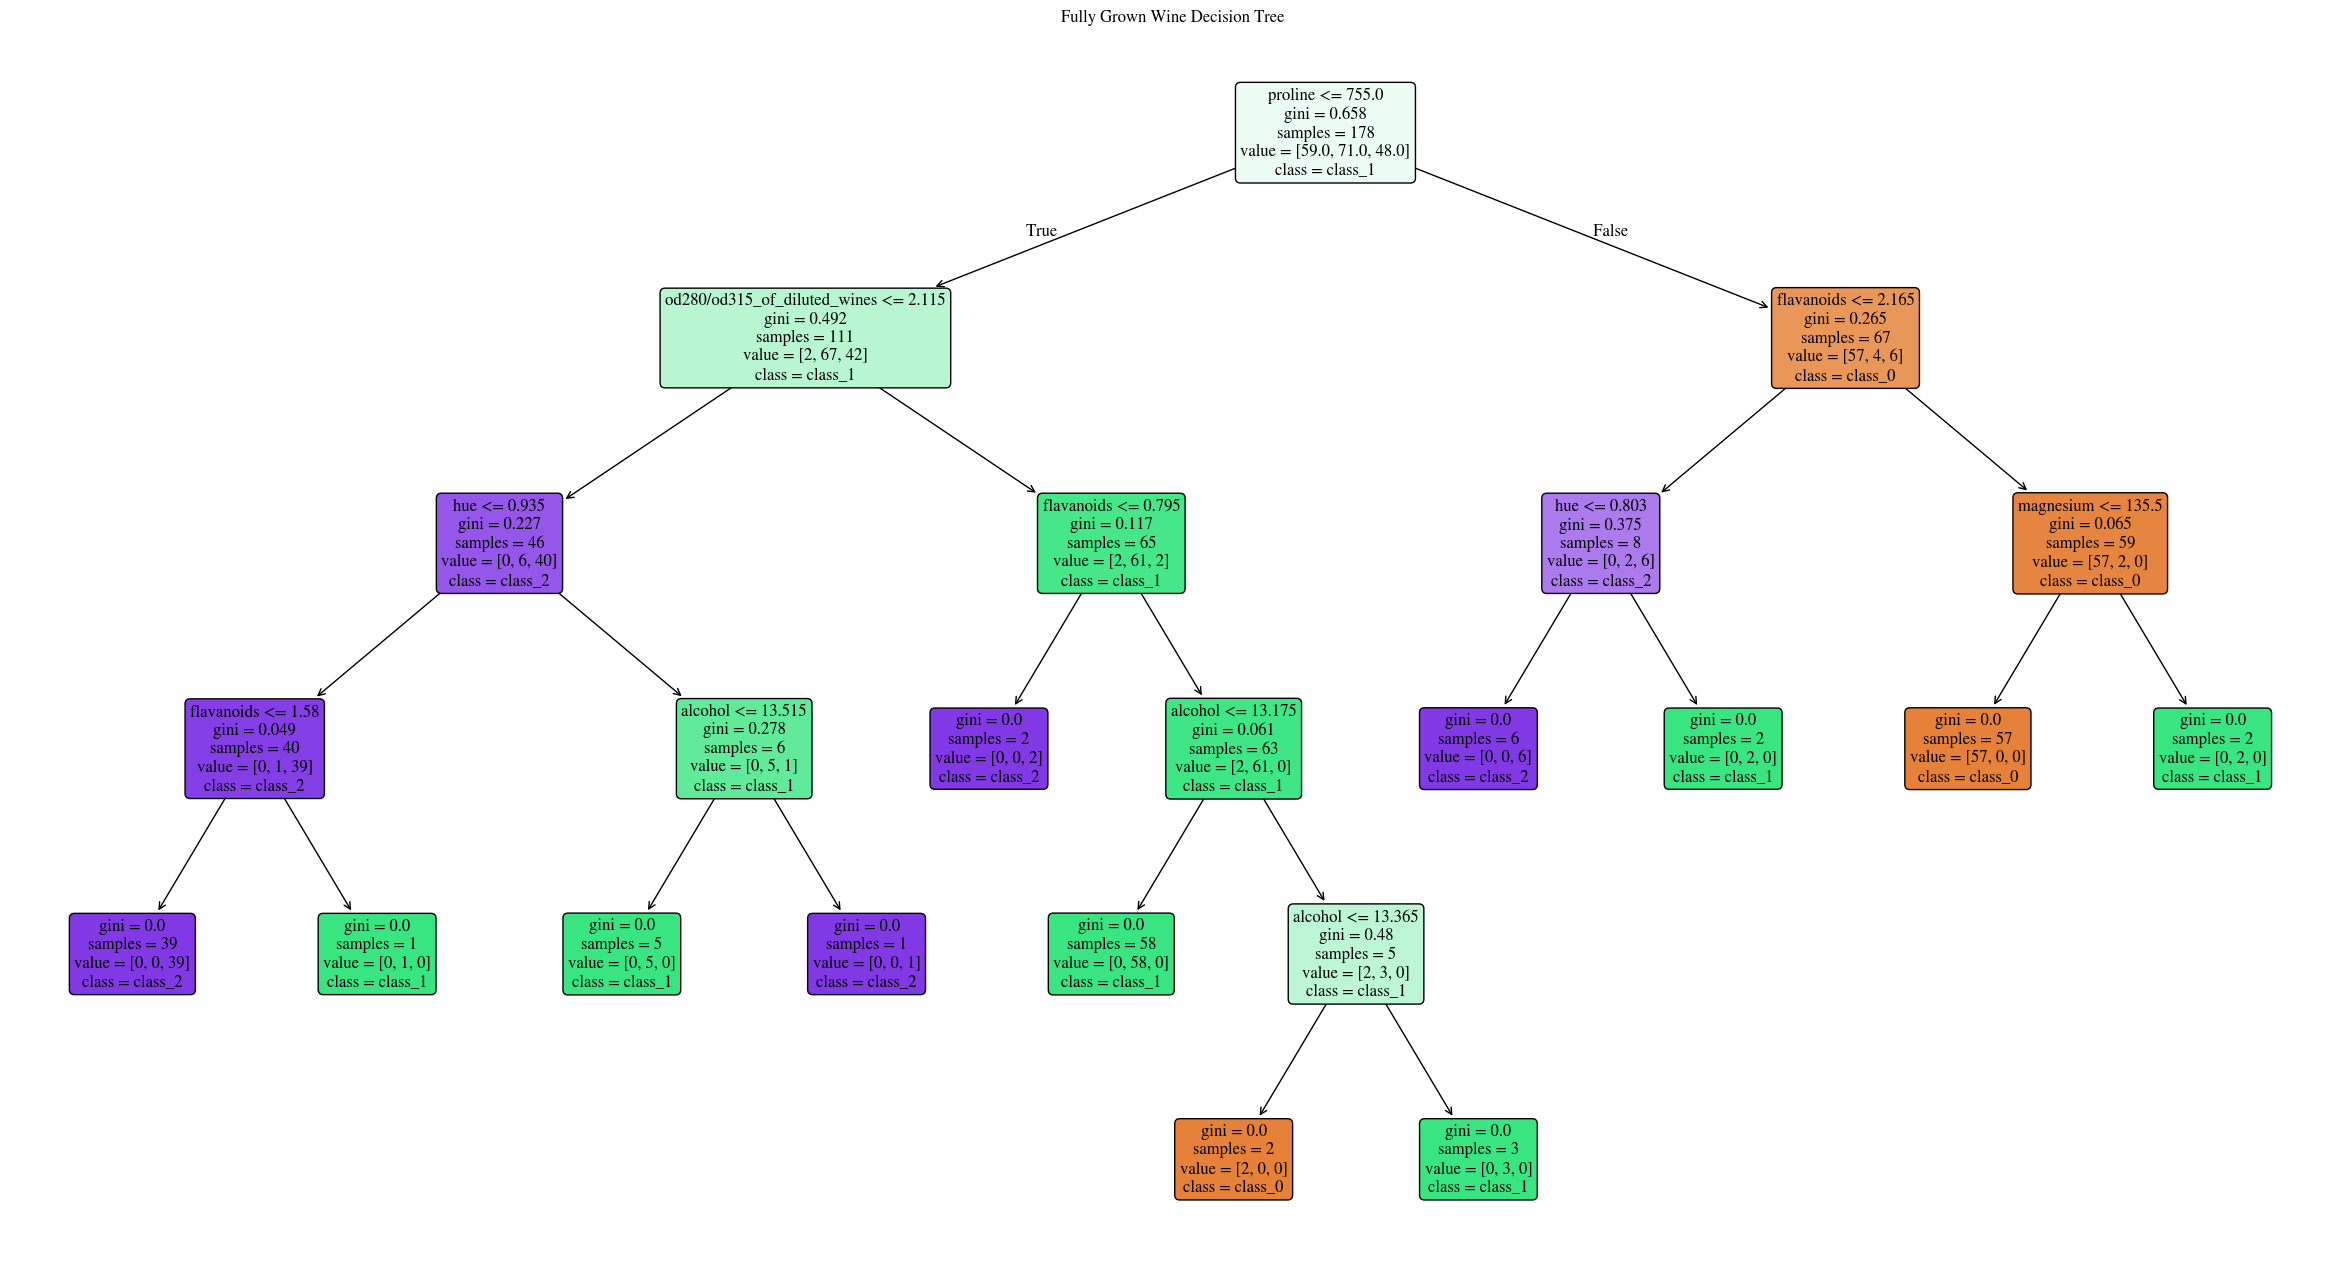

In [2]:
# Untuned Wine Decision Tree

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Set the STIX font for matplotlib
plt.rcParams.update({'font.family': 'STIXGeneral'})

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a decision tree without limitations (fully grown)
DT_clf = DecisionTreeClassifier(random_state=42,
                                  max_depth=None,         # No limit on depth
                                  min_samples_split=2,    # Default split criteria
                                  min_samples_leaf=1)     # Default leaf size
DT_clf.fit(X, y)

# Plot the fully grown decision tree
plt.figure(figsize=(30, 16))
plot_tree(DT_clf,
          feature_names=wine.feature_names,
          class_names=wine.target_names,  # using descriptive names provided in the dataset
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Fully Grown Wine Decision Tree")
plt.show()


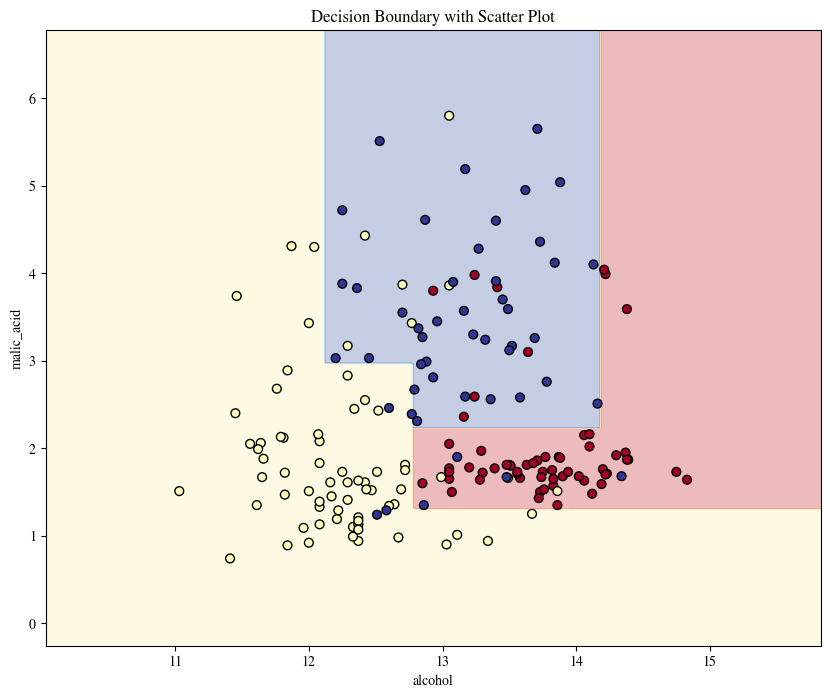

In [3]:
# Decision Boundary with 2 features - Untuned Wine Decision Tree

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

# Load the Wine dataset
wine = load_wine()
# For visualization, select the first two features
X = wine.data[:, :2]
y = wine.target

# Create and train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=707, max_depth=3)
clf.fit(X, y)

# Create a mesh grid over the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and scatter plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title("Decision Boundary with Scatter Plot")
plt.show()


In [ ]:
# - Tuned Wine Decision Tree

import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'STIXGeneral'})

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=707)

# Compute the cost complexity pruning path to obtain candidate ccp_alpha values
dt = DecisionTreeClassifier(random_state=707)
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print("Candidate ccp_alpha values:", ccp_alphas)

# Define a grid of hyperparameters, including ccp_alpha for cost complexity pruning
param_grid = {
    'max_depth': [None, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 10, 20, 30],
    'min_samples_leaf': [1, 3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': ccp_alphas  # Test all candidate pruning values
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=707),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best estimator (model) from the grid search
tuned_clf = grid_search.best_estimator_

# Evaluate the tuned classifier on the test set
y_tuned_pred = tuned_clf.predict(X)
tuned_accuracy = accuracy_score(y, y_tuned_pred)
print("Tuned Test Set Accuracy:", tuned_accuracy)

# Plot the tuned (and pruned) decision tree using STIX fonts
plt.figure(figsize=(30, 16))
plot_tree(tuned_clf,
          feature_names=wine.feature_names,
          class_names=['class_0', 'class_1', 'class_2'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Tuned Wine Decision Tree")
plt.show()

Candidate ccp_alpha values: [0.         0.01548387 0.0306038  0.04389531 0.27667604]


In [ ]:
# Decision Boundary with 2 features - Untuned Wine Decision Tree

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'STIXGeneral'})

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the Wine dataset and select the first two features for 2D visualization
wine = load_wine()
X = wine.data[:, :2]
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=707)

# Compute the cost complexity pruning path to obtain candidate ccp_alpha values
dt = DecisionTreeClassifier(random_state=707)
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print("Candidate ccp_alpha values:", ccp_alphas)

# Define a grid of hyperparameters, including ccp_alpha for cost complexity pruning
param_grid = {
    'max_depth': [None, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 10, 20, 30],
    'min_samples_leaf': [1, 3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': ccp_alphas  # Test all candidate pruning values
}

# Set up GridSearchCV with 5-fold cross-validation using the full dataset
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=707),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best estimator (model) from the grid search
tuned_clf = grid_search.best_estimator_

# Evaluate the tuned classifier on the full dataset
y_tuned_pred = tuned_clf.predict(X)
tuned_accuracy = accuracy_score(y, y_tuned_pred)
print("Tuned Test Set Accuracy:", tuned_accuracy)

# Create the decision boundary plot with a scatter plot
# ------------------------------------------------
# Define the boundaries of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
Z = tuned_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and scatter plot of the data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title("Decision Boundary of Tuned Wine Decision Tree")
plt.show()
